In [1]:
suppressMessages(suppressWarnings(source("../config_duke.R")))

You are on Duke Server: DCC
BASE DIRECTORY:     /work/kk319 
WORK DIRECTORY:     /work/kk319/out/CombEffect_STARR 
LOG  DIRECTORY:     /work/kk319/out/CombEffect_STARR/log 
PATH OF SOURCE:     /work/kk319/source 
PATH OF EXECUTABLE: /work/kk319/exe 
PATH OF ANNOTATION: /work/kk319/annotation 


In [2]:
fdiry = file.path(FD_WRK, "data")
fname = "*/target_PER1.bed"
fglob = file.path(fdiry, fname)
Sys.glob(fglob)

[1] "/work/kk319/out/CombEffect_STARR/data/Input/target_PER1.bed"    
 [2] "/work/kk319/out/CombEffect_STARR/data/Input1/target_PER1.bed"   
 [3] "/work/kk319/out/CombEffect_STARR/data/Input2/target_PER1.bed"   
 [4] "/work/kk319/out/CombEffect_STARR/data/Input3/target_PER1.bed"   
 [5] "/work/kk319/out/CombEffect_STARR/data/Input4/target_PER1.bed"   
 [6] "/work/kk319/out/CombEffect_STARR/data/Input5/target_PER1.bed"   
 [7] "/work/kk319/out/CombEffect_STARR/data/TFX2_DMSO/target_PER1.bed"
 [8] "/work/kk319/out/CombEffect_STARR/data/TFX2_Dex/target_PER1.bed" 
 [9] "/work/kk319/out/CombEffect_STARR/data/TFX3_DMSO/target_PER1.bed"
[10] "/work/kk319/out/CombEffect_STARR/data/TFX3_Dex/target_PER1.bed" 
[11] "/work/kk319/out/CombEffect_STARR/data/TFX4_DMSO/target_PER1.bed"
[12] "/work/kk319/out/CombEffect_STARR/data/TFX4_Dex/target_PER1.bed" 
[13] "/work/kk319/out/CombEffect_STARR/data/TFX5_DMSO/target_PER1.bed"
[14] "/work/kk319/out/CombEffect_STARR/data/TFX5_Dex/target_PER1.bed" 
[15] "/work/kk319/out/CombEffect_STARR/data/TFX_DMSO/target_PER1.bed" 
[16] "/work/kk319/out/CombEffect_STARR/data/TFX_Dex/target_PER1.bed"

In [3]:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End")
fdiry = file.path(FD_WRK, "data")
fname = "target_PER1.bed"

sam   = "Input"
fpath = file.path(fdiry, sam, fname)
dat_bed_input = read_tsv(fpath, col_types=ctypes, col_names=cnames)

sam   = "TFX_DMSO"
fpath = file.path(fdiry, sam, fname)
dat_bed_dmso = read_tsv(fpath, col_types=ctypes, col_names=cnames)

sam   = "TFX_Dex"
fpath = file.path(fdiry, sam, fname)
dat_bed_dex = read_tsv(fpath, col_types=ctypes, col_names=cnames)

In [4]:
head(dat_bed_input, 3)

Chrom,Start,End
chr17,8148117,8149012
chr17,8148122,8149107
chr17,8148178,8149194


In [10]:
dat = dat_bed_input
dat = dat %>% 
    arrange(Start) %>% 
    mutate(idx=1:nrow(dat)) %>% 
    mutate(d=End-Start)
dat_input = dat

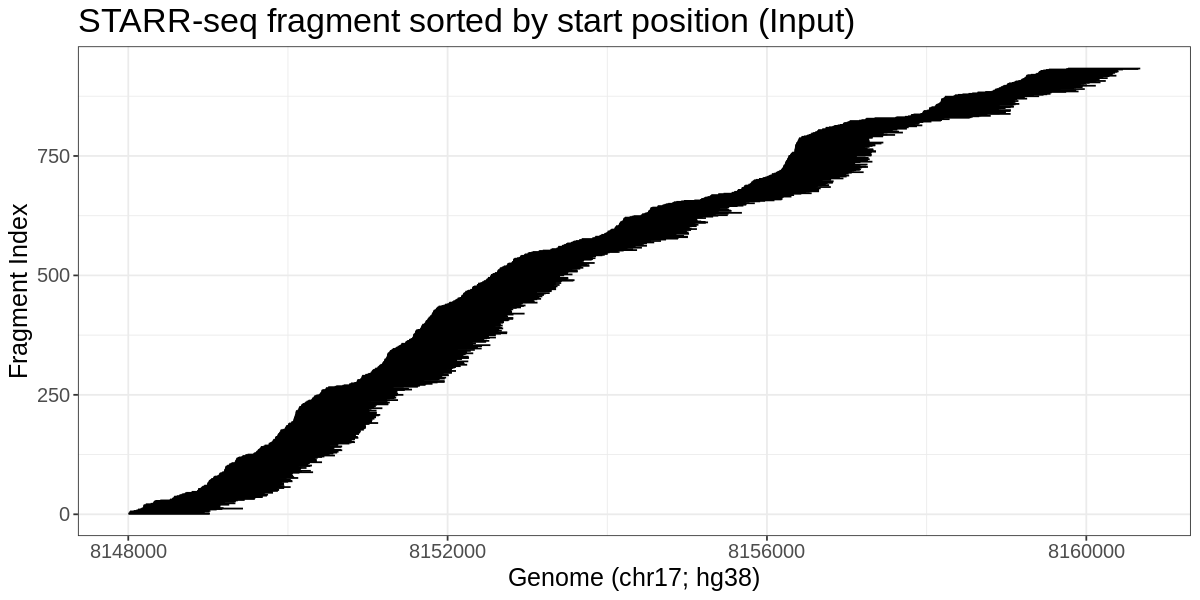

In [11]:
options(repr.plot.height=5, repr.plot.width=10)

gpt = ggplot(dat_input, aes(x=Start, xend=End, y=idx, yend=idx)) 
gpt = gpt + 
    geom_segment() + 
    labs(x="Genome (chr17; hg38)", 
         y="Fragment Index", 
         title="STARR-seq fragment sorted by start position (Input)") +
    theme_bw() +
    theme(
        title      = element_text(size=17),
        axis.title = element_text(size=15),
        axis.text  = element_text(size=12)
    )
gpt

In [12]:
dat = dat_bed_dmso
dat = dat %>% 
    arrange(Start) %>% 
    mutate(idx=1:nrow(dat)) %>% 
    mutate(d=End-Start)
dat_dmso = dat

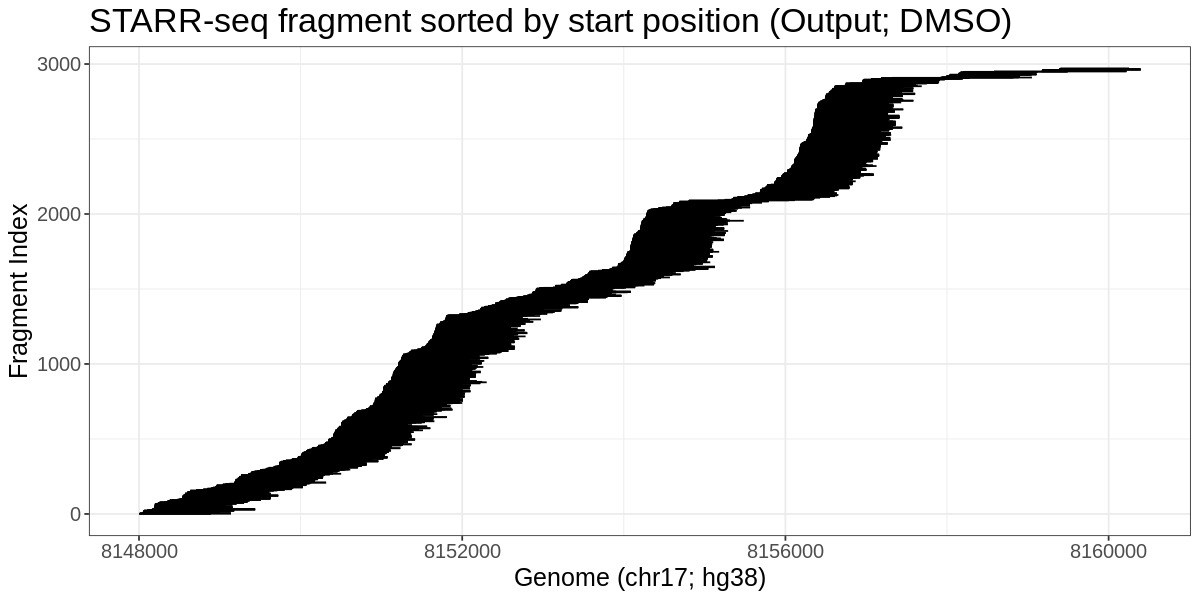

In [14]:
options(repr.plot.height=5, repr.plot.width=10)

gpt = ggplot(dat_dmso, aes(x=Start, xend=End, y=idx, yend=idx)) 
gpt = gpt + 
    geom_segment() + 
    labs(x="Genome (chr17; hg38)", 
         y="Fragment Index", 
         title="STARR-seq fragment sorted by start position (Output; DMSO)") +
    theme_bw() +
    theme(
        title      = element_text(size=17),
        axis.title = element_text(size=15),
        axis.text  = element_text(size=12)
    )
gpt

In [65]:
dat = dat_bed_dex
dat = dat %>% 
    arrange(Start) %>% 
    mutate(idx=1:nrow(dat)) %>% 
    mutate(d=End-Start)
dat_dex = dat

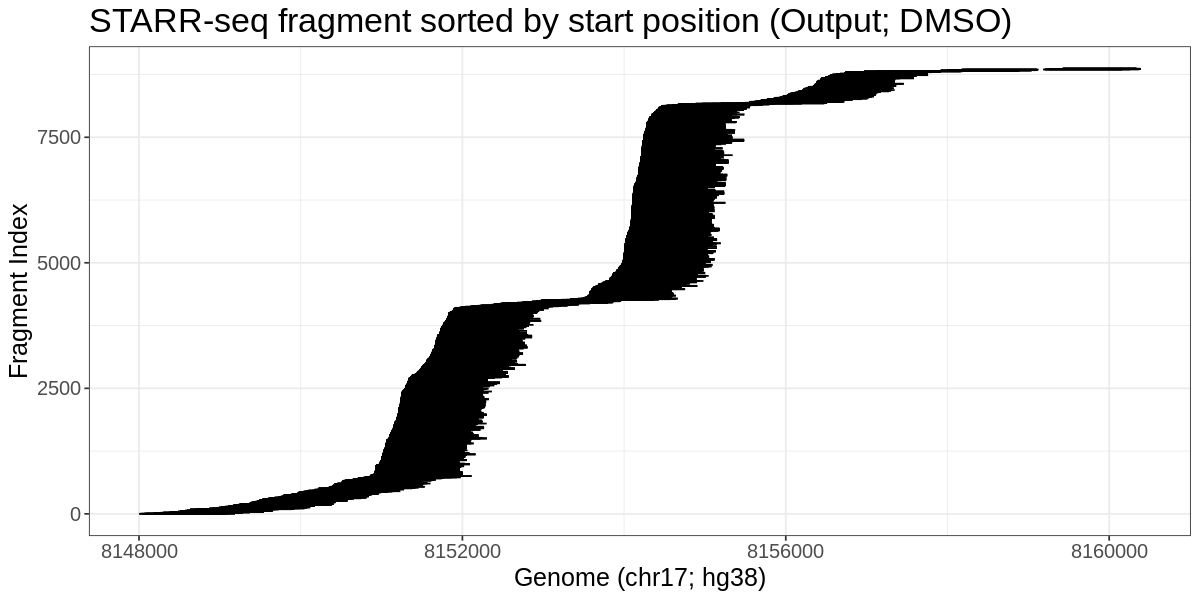

In [67]:
options(repr.plot.height=5, repr.plot.width=10)

gpt = ggplot(dat_dex, aes(x=Start, xend=End, y=idx, yend=idx)) 
gpt = gpt + 
    geom_segment() + 
    labs(x="Genome (chr17; hg38)", 
         y="Fragment Index", 
         title="STARR-seq fragment sorted by start position (Output; DMSO)") +
    theme_bw() +
    theme(
        title      = element_text(size=17),
        axis.title = element_text(size=15),
        axis.text  = element_text(size=12)
    )
gpt

In [46]:
FD_MTF = file.path(FD_ANN, "motif_jaspar_2020")
dir(FD_MTF)

[1] "MA0099.3.tsv" "MA0113.3.tsv"

In [60]:
FD_MTF = file.path(FD_ANN, "motif_jaspar_2020")

ctypes = c(col_character(), col_integer(), col_integer(), col_character(), 
           col_integer(), col_integer(), col_character())
cnames = c("Chrom", "Start", "End", "Motif",
           "Score", "nlog10_pval", "Strand")

fdiry = FD_MTF
fname = "MA0113.3.tsv"
dat_mtf_nr20 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

fdiry = FD_MTF
fname = "MA0099.3.tsv"
dat_mtf_ap1 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

In [61]:
#lst_mtf = list("NR/20" = "red", "AP1/1" = "cornflowerblue", "AP1/2" = "chartreuse4")
lst_mtf = list("NR3C1" = "red", "FOS::JUN" = "cornflowerblue")

In [62]:
head(dat_mtf_nr20)

Chrom,Start,End,Motif,Score,nlog10_pval,Strand
chr10,11650,11667,NR3C1,814,384,+
chr10,16730,16747,NR3C1,825,399,+
chr10,16730,16747,NR3C1,826,400,-
chr10,16911,16928,NR3C1,815,384,+
chr10,22894,22911,NR3C1,801,365,+
chr10,22894,22911,NR3C1,807,373,-


In [63]:
range(dat_mtf_nr20$nlog10_pval)

[1] 363 963

In [57]:
dat1 = dat_mtf_nr20 %>% dplyr::filter(Chrom == "chr17", Start >= 8148000, Start <= 8160000)
dat2 = dat_mtf_ap1  %>% dplyr::filter(Chrom == "chr17", Start >= 8148000, Start <= 8160000)
dat_mtf = bind_rows(dat1, dat2) %>% 
    dplyr::select(Chrom, Start, End, Motif) %>% 
    distinct
dat_mtf = dat_mtf %>% mutate(Color = unlist(lst_mtf[Motif]))
dat_mtf

Chrom,Start,End,Motif,Color
chr17,8151910,8151927,NR3C1,red
chr17,8154458,8154475,NR3C1,red
chr17,8154759,8154776,NR3C1,red
chr17,8148258,8148268,FOS::JUN,cornflowerblue
chr17,8148424,8148434,FOS::JUN,cornflowerblue
chr17,8148916,8148926,FOS::JUN,cornflowerblue
chr17,8149051,8149061,FOS::JUN,cornflowerblue
chr17,8149086,8149096,FOS::JUN,cornflowerblue
chr17,8149891,8149901,FOS::JUN,cornflowerblue
chr17,8149892,8149902,FOS::JUN,cornflowerblue


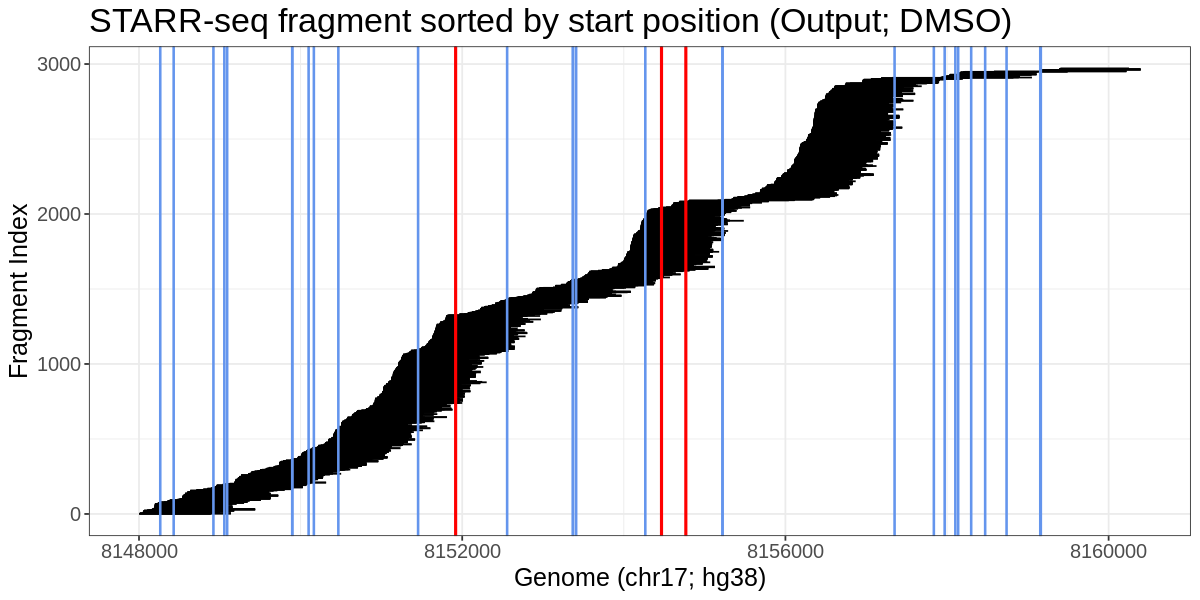

In [69]:
options(repr.plot.height=5, repr.plot.width=10)

gpt = ggplot(dat_dmso, aes(x=Start, xend=End, y=idx, yend=idx)) 
gpt = gpt + 
    geom_segment() + 
    labs(x="Genome (chr17; hg38)", 
         y="Fragment Index", 
         title="STARR-seq fragment sorted by start position (Output; DMSO)") +
    theme_bw() +
    theme(
        title      = element_text(size=17),
        axis.title = element_text(size=15),
        axis.text  = element_text(size=12)
    )

gpt = gpt + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax = Inf,
        color = dat_mtf$Color)
print(gpt)

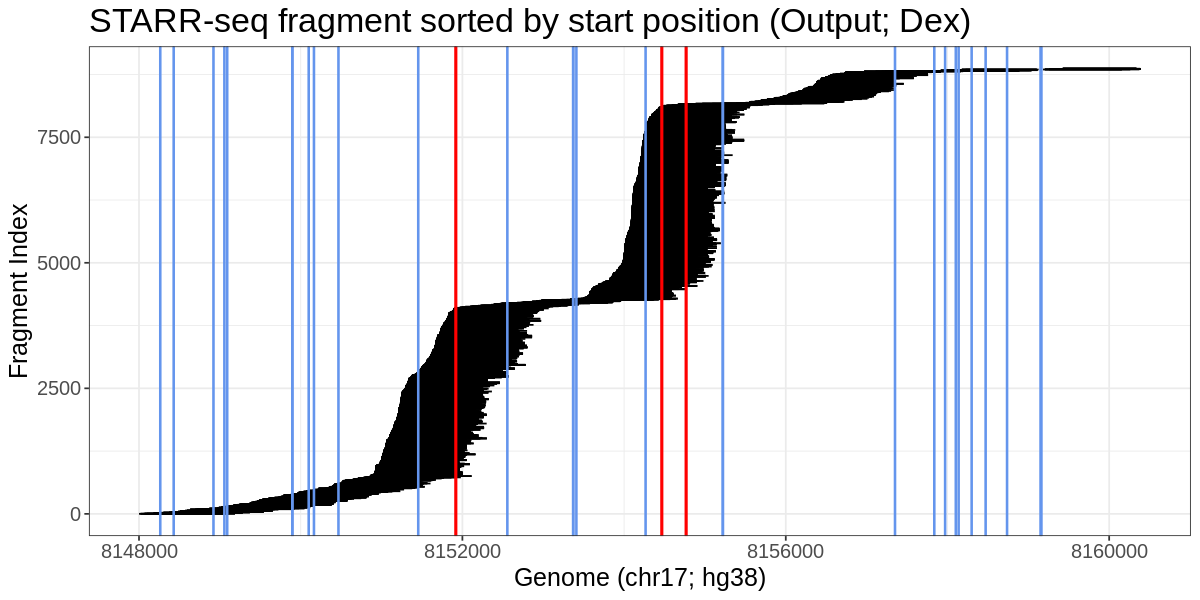

In [70]:
options(repr.plot.height=5, repr.plot.width=10)

gpt = ggplot(dat_dex, aes(x=Start, xend=End, y=idx, yend=idx)) 
gpt = gpt + 
    geom_segment() + 
    labs(x="Genome (chr17; hg38)", 
         y="Fragment Index", 
         title="STARR-seq fragment sorted by start position (Output; Dex)") +
    theme_bw() +
    theme(
        title      = element_text(size=17),
        axis.title = element_text(size=15),
        axis.text  = element_text(size=12)
    )

gpt = gpt + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax = Inf,
        color = dat_mtf$Color)
print(gpt)

In [15]:
FD_MTF = file.path(FD_ANN, "motif_cluster_jvierstra", "hg38_archetype_motifs_v1")

In [22]:
chrom = "chr17"
fdiry = file.path(FD_MTF, chrom)
dir(fdiry) %>% grep(x = ., pattern = "NR_20", value = TRUE)

[1] "NR_20_merge.bed" "NR_20.bed"

In [25]:
fdiry = file.path(FD_MTF, chrom)
fname = "NR_20.bed"
fpath = file.path(fdiry, fname)
system(paste("head -3", fpath), intern = TRUE)

[1] "chr17\t60454\t60468\tNR/20\t8.3104\t+\tGCR_HUMAN.H11MO.0.A\t1" 
[2] "chr17\t60718\t60732\tNR/20\t8.8112\t-\tGCR_HUMAN.H11MO.0.A\t4" 
[3] "chr17\t63497\t63511\tNR/20\t7.5233\t-\tPRGR_HUMAN.H11MO.0.A\t2"

```
ctypes = c(col_character(), col_integer(), col_integer(), col_character(), col_double())
cnames = c("Chrom", "Start", "End", "Motif", "Score")
chrom = "chr17"
fdiry = file.path(FD_MTF, chrom)

fname = "NR_20_merge.bed"
dat_mtf_nr20 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

fname = "AP1_1_merge.bed"
dat_mtf_ap11 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

fname = "AP1_2_merge.bed"
dat_mtf_ap12 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)
```

In [26]:
ctypes = c(
    col_character(), col_integer(),   col_integer(), col_character(), col_double(),
    col_character(), col_character(), col_integer()
)
cnames = c(
    "Chrom",  "Start", "End", "Motif_Cluster", "Score", 
    "Strand", "Motif", "Num_Models")

chrom = "chr17"
fdiry = file.path(FD_MTF, chrom)
fname = "NR_20.bed"

dat_mtf_nr20 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

In [44]:
dat_mtf = dat_mtf_nr20 %>% 
    dplyr::filter(grepl(x=Motif, pattern="NR3C1|GCR")) %>%
    dplyr::filter(Start >= 8148000, Start <= 8160000)
dat_mtf

Chrom,Start,End,Motif_Cluster,Score,Strand,Motif,Num_Models
chr17,8150232,8150246,NR/20,8.3256,+,GCR_HUMAN.H11MO.0.A,2
chr17,8150831,8150845,NR/20,7.3429,-,GCR_HUMAN.H11MO.0.A,1
chr17,8154459,8154473,NR/20,15.1186,-,NR3C1_MA0113.3,11
chr17,8154460,8154474,NR/20,15.5768,+,NR3C1_MA0113.3,12


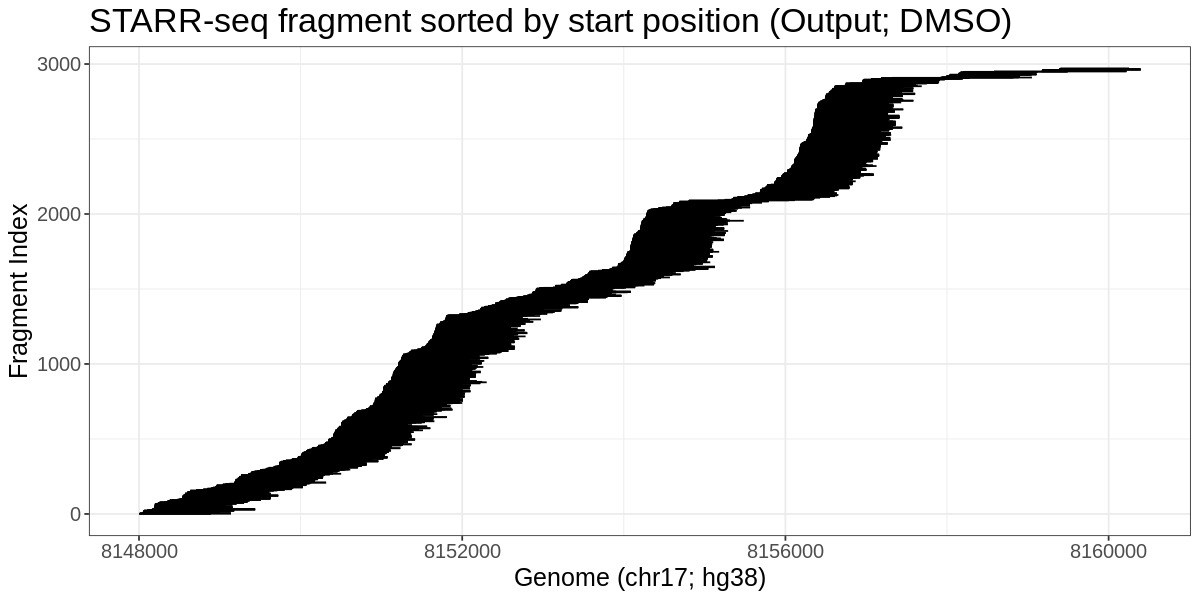

In [39]:
options(repr.plot.height=5, repr.plot.width=10)

gpt = ggplot(dat_dmso, aes(x=Start, xend=End, y=idx, yend=idx)) 
gpt = gpt + 
    geom_segment() + 
    labs(x="Genome (chr17; hg38)", 
         y="Fragment Index", 
         title="STARR-seq fragment sorted by start position (Output; DMSO)") +
    theme_bw() +
    theme(
        title      = element_text(size=17),
        axis.title = element_text(size=15),
        axis.text  = element_text(size=12)
    )
gpt

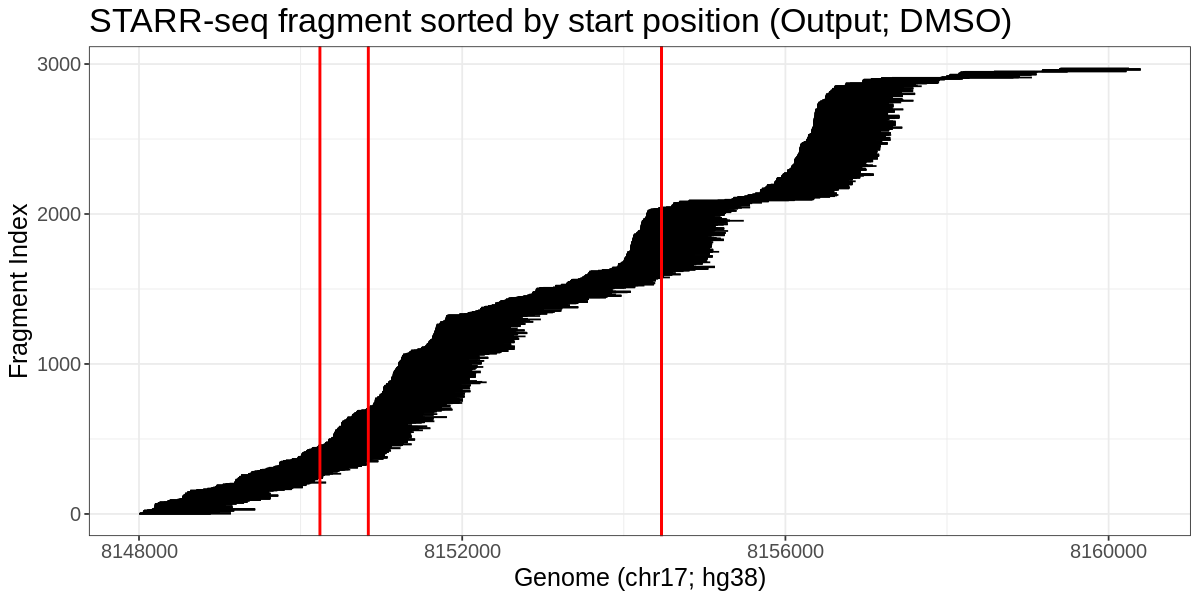

In [45]:
gpt = gpt + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax = Inf,
        color="red")
print(gpt)